# Intro to DeepLearning algorithm 
## Getting images

### Step 1 - get api key 
* https://www.microsoft.com/en-us/maps/create-a-bing-maps-key
* sign in 
* generate api key 

### Step 2 - do the following

In [1]:
from DeepPoolAI import AerialImage, GridPhotos, PoolAddressParser

In [2]:
# Your Bing Maps Api key Here
# for example from file listed in .gitignore
f = open('key.txt', 'r')
key = f.read()

In [3]:
ai = AerialImage(key = key,zoomLevel=18, height=1000, width=1000)

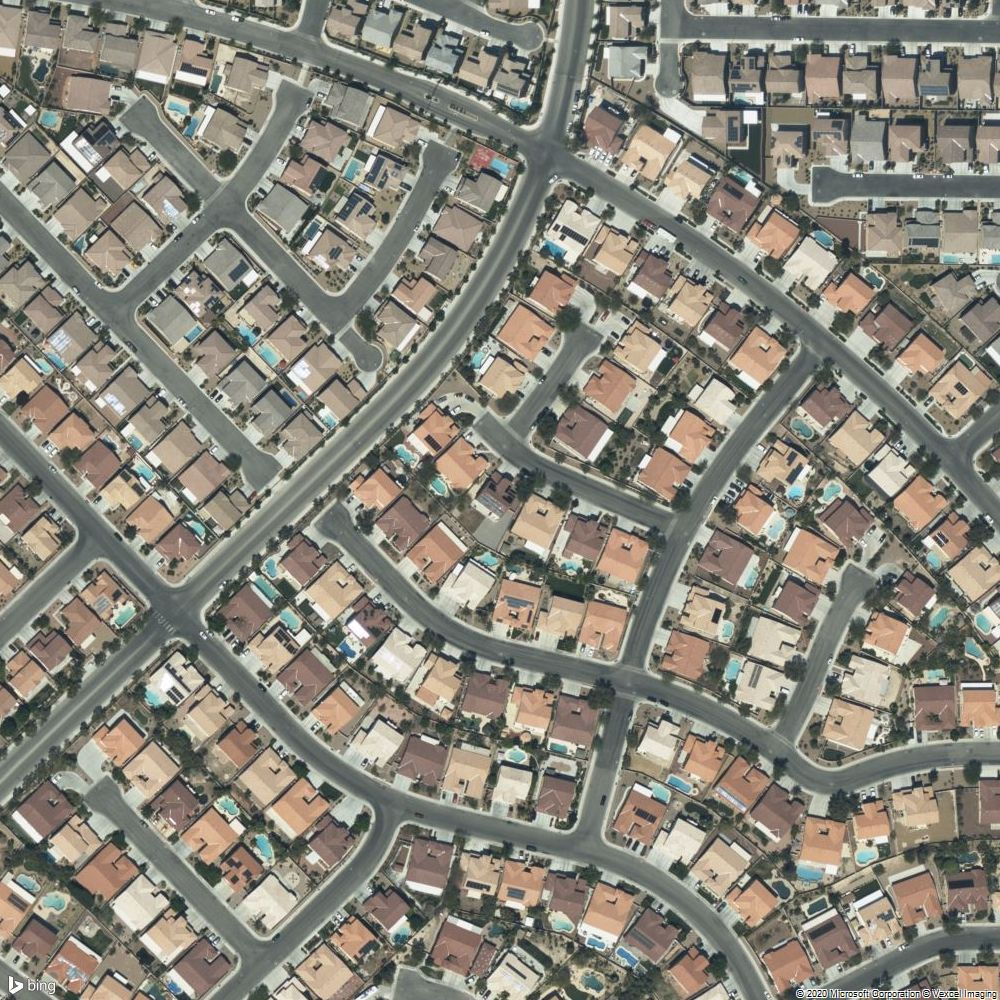

In [4]:
photo = ai.get_photo(lat=36.2806, long = -115.1626)
photo

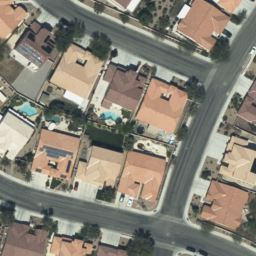

In [5]:
ai.get_square_photo(lat=36.280659, long = -115.162661)

## Photo Grid

To cover terrain we will need to get the centers of subterrains represented by photos. 

In [6]:
gp = GridPhotos(38.684290723162526,
                -121.53796608554585,
                38.683101470549765,
                -121.53249437915547,
                key = key, 
                zoomLevel=18,
                height=500,
                width=500)

They can be visualized with the following method. Please **DO NOT visualize big terrains**. It internally uses `get_coords` to work, then it stitches the photos together

In [7]:
#arr, plt = ai.get_grid_photos(38.684290723162526,-121.53796608554585, 38.683101470549765,-121.53249437915547)

`arr` (first argument) is array with photos

Funtion above returns area filled with photos. It is only for visualization purposes. How to visualize pools here? 

## Visualization

In [8]:
from DeepPoolAI import PoolDetector

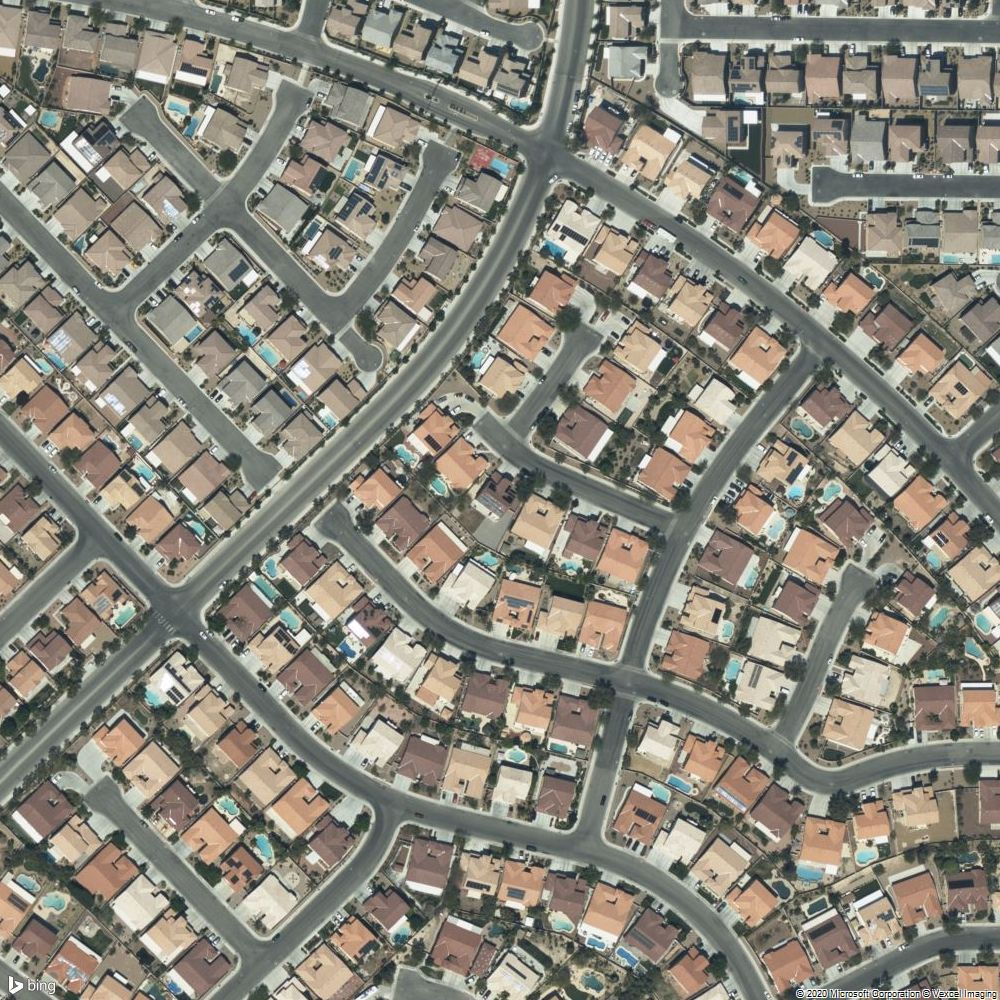

In [9]:
photo = ai.get_photo(lat=36.2806, long = -115.1626)
photo

In [10]:
pd = PoolDetector(photo)
pd.get_pools()

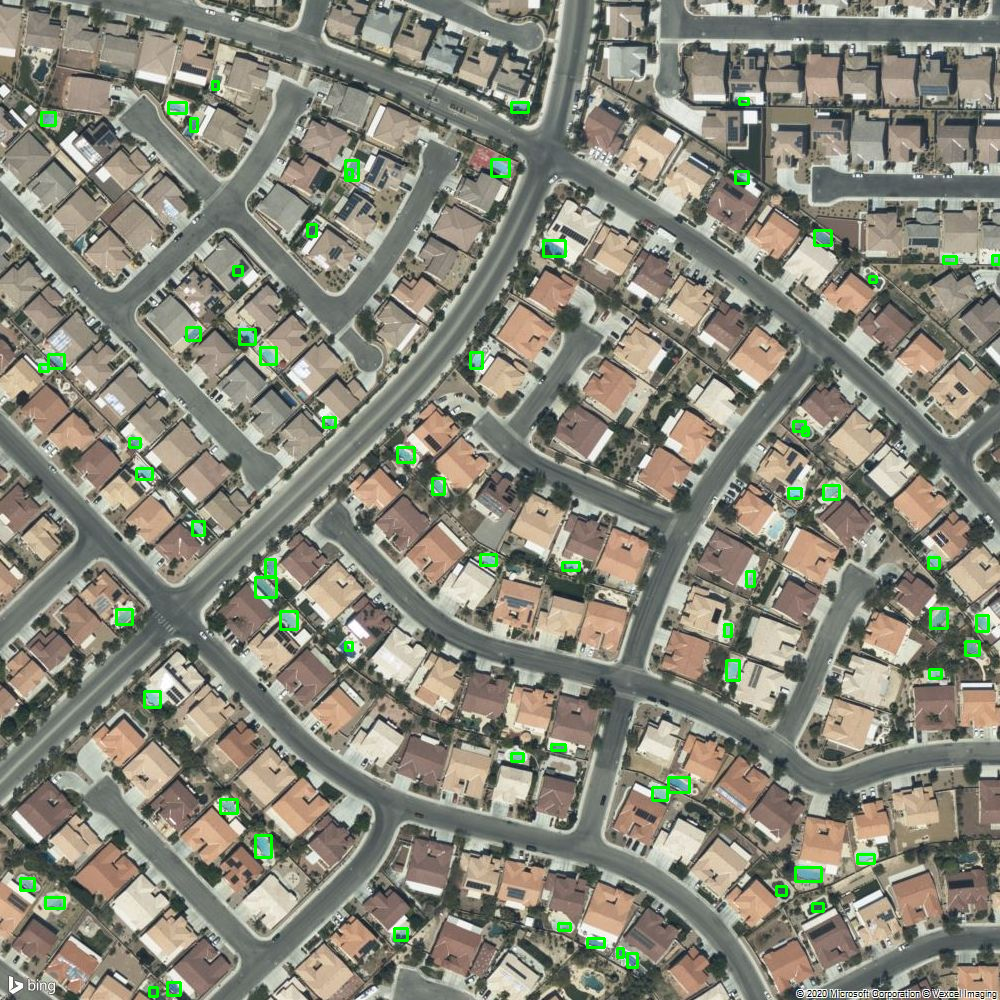

In [11]:
pd.print_boxes()

In [12]:
pd = PoolDetector(ai.get_photo(36.27868663, -115.1643616))

In [13]:
pd.get_pools()

In [14]:
pd.boxes[:10]

[[251, 272, 914, 927],
 [608, 626, 903, 911],
 [651, 657, 901, 909],
 [331, 351, 901, 910],
 [394, 407, 899, 909],
 [728, 735, 896, 904],
 [850, 867, 885, 898],
 [783, 799, 828, 840],
 [493, 500, 780, 794],
 [302, 313, 773, 789]]

In [15]:
pd.pixel_coords[:10]

[[261.5, 920.5],
 [617.0, 907.0],
 [654.0, 905.0],
 [341.0, 905.5],
 [400.5, 904.0],
 [731.5, 900.0],
 [858.5, 891.5],
 [791.0, 834.0],
 [496.5, 787.0],
 [307.5, 781.0]]

## Large Scale pool finding

In [16]:
grid = GridPhotos(36.280037698135956, -115.1657478156161,
                  36.280848612920906, -115.16704244961332,
                  key = key,
                  zoomLevel=18,
                  height=500,
                  width=500)

In [17]:
grid.fit() # fit method takes care of everything

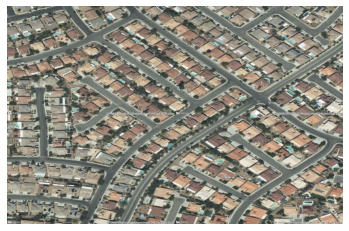

In [18]:
photo = grid.get_grid() # dont plot big terrains

In [19]:
grid.pool_coords

[[36.27989748128043, -115.16729056835175],
 [36.280148298988465, -115.16610503196716],
 [36.280278031969466, -115.1673012971878],
 [36.280377493775546, -115.16835272312164],
 [36.28043803568242, -115.1665610074997],
 [36.280576417007495, -115.1667058467865],
 [36.28066722961874, -115.16741931438446],
 [36.28074506891573, -115.16679167747498],
 [36.280792637336766, -115.16697406768799],
 [36.28124669807864, -115.16632497310638],
 [36.28129426619399, -115.1682722568512],
 [36.281359131759096, -115.16807913780212],
 [36.28138075360216, -115.16759097576141],
 [36.281411024172364, -115.16642689704895],
 [36.28167048572122, -115.16674339771271],
 [36.28189967603861, -115.16593337059021],
 [36.27777414735808, -115.16770362854004],
 [36.277765498221974, -115.16622304916382],
 [36.27807686651877, -115.1661479473114],
 [36.278089840170836, -115.16652882099152],
 [36.27843580343093, -115.16637861728668],
 [36.278474724201736, -115.16588509082794],
 [36.27855256568513, -115.16786992549896],
 [36.2

## Reverse-geocoding 
#### Extracting addresses from Lat Long coordinates

In [20]:
pars = PoolAddressParser(key)

In [21]:
pool_addresses = pars.get_addresses(grid.pool_coords, verbose = True)

Reverse-geocoding progress 100.0%  67/67
[##################################################]
Errors:  0


In [22]:
pool_addresses[0]

{'coordinates': [[36.27989748128043, -115.16729056835175]],
 'address': {'addressLine': '6513 Summer Bluff Ct',
  'adminDistrict': 'NV',
  'adminDistrict2': 'Clark Co.',
  'countryRegion': 'United States',
  'formattedAddress': '6513 Summer Bluff Ct, North Las Vegas, NV 89084',
  'intersection': {'baseStreet': 'Summer Bluff Ct',
   'secondaryStreet1': 'Evening Bluff Pl',
   'intersectionType': 'Near',
   'displayName': 'Summer Bluff Ct and Evening Bluff Pl'},
  'locality': 'El Dorado',
  'postalCode': '89084'}}

In [23]:
pars.write_to_xml("file.xml" )